# MSCI 436 Team 8 ML Decision Model
1. Import packages
2. Load Data
3. Clean Data
4. Fit a LR model
5. Model Evaluation


# Import Packages

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [40]:
raw_data_train = pd.read_csv('https://raw.githubusercontent.com/jmpark0808/pl_mnist_example/main/train_hp_msci436.csv')
raw_data_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
raw_data_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [42]:
print(raw_data_train.shape)

(1460, 81)


# Cleaning Data

In [43]:
df = raw_data_train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-45-9fab0a6f4364>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice']);


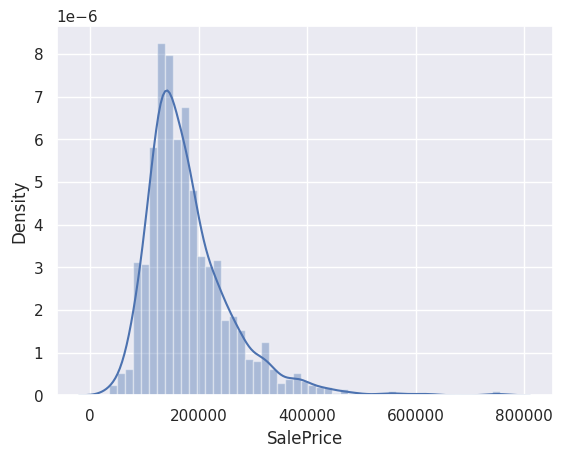

In [45]:
sns.distplot(df['SalePrice']);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


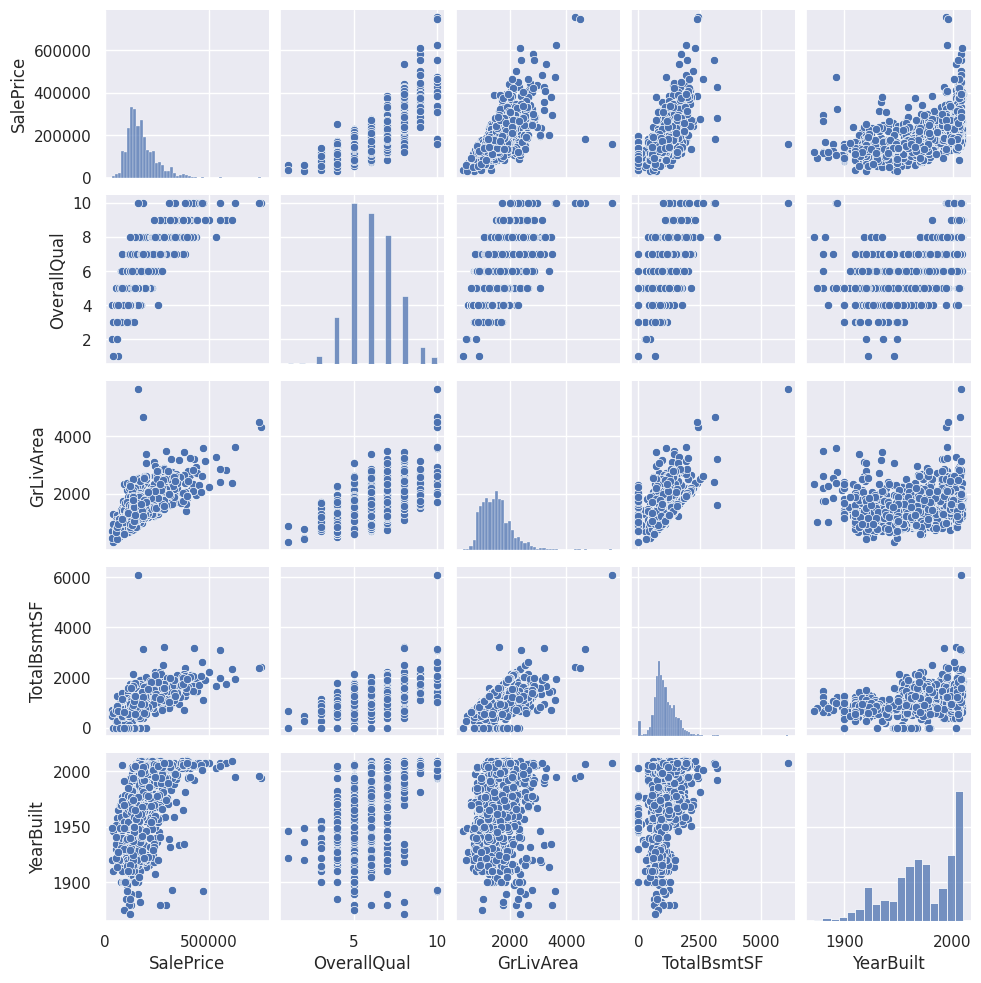

In [46]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df[cols], size = 2)
plt.show();

## **Checking Null Values**

In [47]:
# checking for null values
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [48]:
print(df[df['LotFrontage'].isnull() | (df['LotFrontage'] == 0)])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1429  1430          20       RL          NaN    12546   Pave   NaN      IR1   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In this case 0 could just mean that there is no street connected to the property, 0 is fine

In [49]:
#cite
#checking which features are the more irrelevant (most houses don't have this feature)
total = df.isna().sum().sort_values(ascending=False)  # Count NaN and numeric 0 values
percent = (df.isna().sum() / len(df)).sort_values(ascending=False)  # Calculate percentage of NaN and numeric 0 values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [50]:
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...

<ipython-input-50-4194c6139846>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

In [51]:
print(df.shape)
df.head()

(1459, 63)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Checking Categorical Variables

In [52]:
# Get column names with 'object' data type
object_columns = df.select_dtypes(include='object').columns

# Iterate over the 'object' columns
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("--------------------")

Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------
Column: Street
['Pave' 'Grvl']
--------------------
Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
--------------------
Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
--------------------
Column: Utilities
['AllPub' 'NoSeWa']
--------------------
Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------
Column: LandSlope
['Gtl' 'Mod' 'Sev']
--------------------
Column: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------
Column: Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
--------------------
Column: Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
--------------------
Column: BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE'

In this case, 0 just means that the house doesn't have that particular feature. It's not necessarily a missing value. This is important information. For example, a user might want to know if a pool vs no pool would make a significant difference in value in case they have a budget and space to add a pool.

## One hot encoding

In [53]:
#code for reference
# Select the categorical columns to be one-hot encoded (excluding the '0' values)
categorical_columns = df.select_dtypes(include='object').columns

# Create a new DataFrame with the original '0' values intact
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Print the encoded DataFrame
print(encoded_df)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0             2003         706           0        150  ..

In [54]:
df = encoded_df
print(df.shape)
df.head()

(1459, 222)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


# Model

In [55]:
df_clean = df.select_dtypes(include = ['float64', 'int64']).fillna(0)
X = df.loc[:, ~df.columns.isin(['SalePrice', 'Id'])]
y = df["SalePrice"]

## Train Test Split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.70, random_state=1)
# when doing experiment you want to have a controlled chaos, random_state = 1, 1 is a non-negative integer seed
# a seed will generate the same set of random numbers every time
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(437, 220) (1022, 220) (437,) (1022,)


# Fit a Linear Regression Model

In [57]:
reg = LinearRegression().fit(X_train, Y_train)
reg.coef_

array([-1.04893578e+02,  3.13471447e-01,  3.95063304e+03,  5.18995588e+03,
        2.06974767e+02,  9.67753932e+01,  1.31323349e+01,  1.07732474e+01,
        2.11274910e+00,  2.60183425e+01,  1.17416119e+01,  2.20940533e+01,
        1.01052501e+01,  4.39409137e+01,  6.18525849e+03, -9.75903558e+02,
        9.27054786e+03,  2.76025331e+02, -5.17615224e+03, -2.99088365e+04,
        2.32632110e+03,  4.77572025e+02,  8.73980923e+03,  3.37870721e+00,
        6.82165184e+00, -1.25556910e+01,  1.96795854e+00,  4.31210717e+00,
        4.97623093e+01, -1.02880887e+02,  1.58223562e+01, -5.44302697e+02,
        2.94787934e+02, -3.21054342e+04,  1.07335848e+04,  1.90104663e+04,
       -2.63265334e+03,  4.99403647e+03, -6.87989433e+03,  6.87989433e+03,
       -7.00733657e+03,  6.15261368e+03,  1.02578753e+04, -9.40315244e+03,
       -2.81059640e+03,  1.02808252e+04, -6.07009485e+03, -1.40013394e+03,
        1.02142663e+04, -1.02142663e+04,  2.35207459e+03,  8.17442307e+03,
       -8.90308316e+03, -

In [58]:
# predict values
# y_pred = reg.predict(Y_test)
# y_pred

# Model Evaulation

In [59]:
reg_pred = reg.predict(X_test)
reg_mse = mean_squared_error(Y_test, reg_pred)

print("Mean Squared Error (MSE): ", reg_mse)

Mean Squared Error (MSE):  2156354567.947122


# Selected Columns - Interface




In [60]:
df_interface = raw_data_train
df_interface

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<ipython-input-61-9147ad6fff8b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_interface.corr()


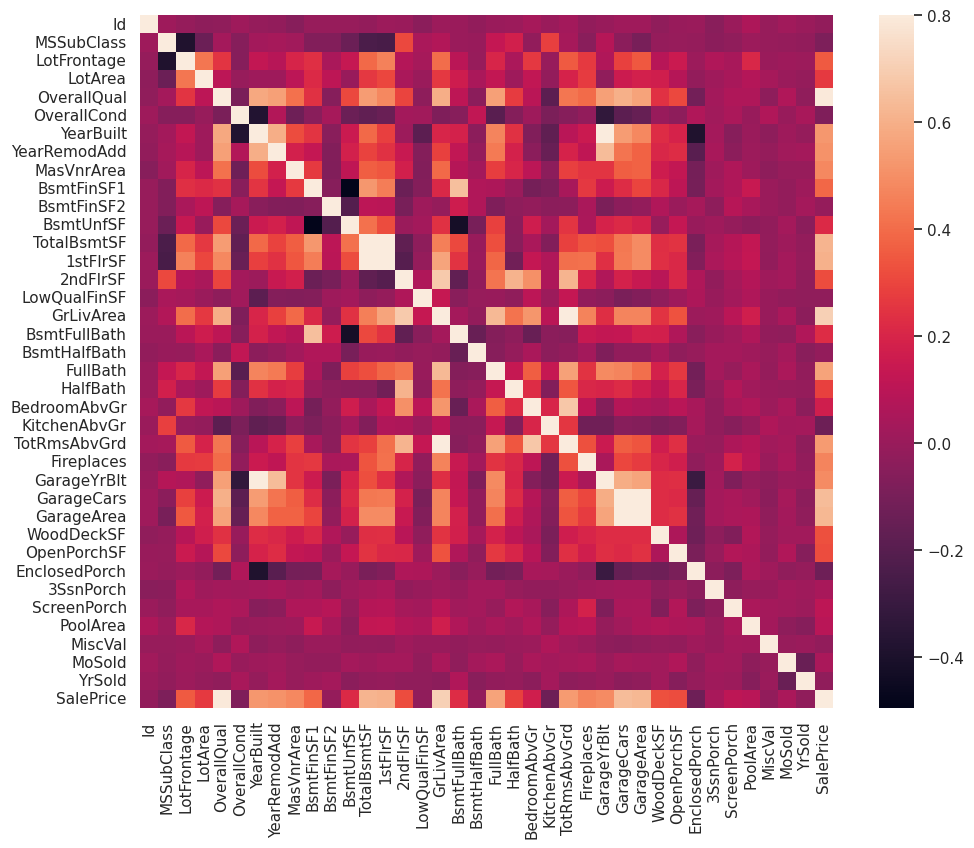

In [61]:
### Heatmap
#correlation matrix
corrmat = df_interface.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [62]:
df_interface_v2 = df_interface[['OverallQual', 'LotFrontage','YearBuilt', 'YearRemodAdd',
                             'MasVnrArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
                             'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']].copy()
df_interface_v2

,OverallQual,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,65.0,2003,2003,196.0,856,706,856,854,1710,2,1,8,0,2003.0,2,548,0,61,208500
1,6,80.0,1976,1976,0.0,1262,978,1262,0,1262,2,0,6,1,1976.0,2,460,298,0,181500
2,7,68.0,2001,2002,162.0,920,486,920,866,1786,2,1,6,1,2001.0,2,608,0,42,223500
3,7,60.0,1915,1970,0.0,756,216,961,756,1717,1,0,7,1,1998.0,3,642,0,35,140000
4,8,84.0,2000,2000,350.0,1145,655,1145,1053,2198,2,1,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,62.0,1999,2000,0.0,953,0,953,694,1647,2,1,7,1,1999.0,2,460,0,40,175000
1456,6,85.0,1978,1988,119.0,1542,790,2073,0,2073,2,0,7,2,1978.0,2,500,349,0,210000
1457,7,66.0,1941,2006,0.0,1152,275,1188,1152,2340,2,0,9,2,1941.0,1,252,0,60,266500
1458,5,68.0,1950,1996,0.0,1078,49,1078,0,1078,1,0,5,0,1950.0,1,240,366,0,142125


In [63]:
#cite
# Checking which features are the more irrelevant (most houses don't have this feature)
# Count NaN and numeric 0 values
total = df_interface_v2.isna().sum().sort_values(ascending=False)

# Calculate percentage of NaN and numeric 0 values
percent = (df_interface_v2.isna().sum() / len(df)).sort_values(ascending=False)

# Group and print missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177519
GarageYrBlt,81,0.055517
MasVnrArea,8,0.005483
OverallQual,0,0.000000
HalfBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000


In [64]:
df_interface_v2 = df_interface_v2.drop((missing_data[missing_data['Total'] > 1]).index,1)

# Checking that there's no missing data missing...
df_interface_v2.isnull().sum().max()

<ipython-input-64-7891924769ae>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_interface_v2 = df_interface_v2.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

In [65]:
#code for reference
# Select the categorical columns to be one-hot encoded (excluding the '0' values)
categorical_columns = df_interface_v2.select_dtypes(include='object').columns

# Create a new DataFrame with the original '0' values intact
encoded_df = pd.get_dummies(df_interface_v2, columns=categorical_columns, drop_first=False)

# Print the encoded DataFrame
print(encoded_df)

      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  BsmtFinSF1  1stFlrSF  \
0               7       2003          2003          856         706       856   
1               6       1976          1976         1262         978      1262   
2               7       2001          2002          920         486       920   
3               7       1915          1970          756         216       961   
4               8       2000          2000         1145         655      1145   
...           ...        ...           ...          ...         ...       ...   
1455            6       1999          2000          953           0       953   
1456            6       1978          1988         1542         790      2073   
1457            7       1941          2006         1152         275      1188   
1458            5       1950          1996         1078          49      1078   
1459            5       1965          1965         1256         830      1256   

      2ndFlrSF  GrLivArea  

In [66]:
df_clean = encoded_df.select_dtypes(include = ['float64', 'int64']).fillna(0)
X = encoded_df.loc[:, ~encoded_df.columns.isin(['SalePrice', 'Id'])]
y = encoded_df["SalePrice"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# when doing experiment you want to have a controlled chaos, random_state = 1, 1 is a non-negative integer seed
# a seed will generate the same set of random numbers every time
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1022, 16) (438, 16) (1022,) (438,)


In [67]:
X_test.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')

In [68]:
reg = LinearRegression().fit(X_train, Y_train)
reg.coef_

array([1.94482049e+04, 1.50966955e+02, 3.27059555e+02, 1.04005343e+01,
       1.53714692e+01, 1.90786377e+01, 8.72407028e+00, 1.51267158e+01,
       1.68022818e+03, 1.15399697e+03, 4.05867977e+03, 9.73975753e+03,
       1.41551289e+04, 6.38791024e+00, 3.92963468e+01, 1.52989027e+01])

In [69]:
# predict values
y_pred = reg.predict(X_test)

In [70]:
reg_pred = reg.predict(X_test)
reg_mse = mean_squared_error(Y_test, reg_pred)

print("Mean Squared Error (MSE): ", reg_mse)

Mean Squared Error (MSE):  1223140953.7444055


In [71]:
merged_data = np.concatenate((X_test, reg_pred.reshape(-1, 1)), axis=1)
column_names = list(X_test.columns) + ['SalePrice']
df_merged = pd.DataFrame(merged_data, columns=column_names)
df_merged


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,2001.0,2001.0,963.0,361.0,963.0,829.0,1792.0,2.0,1.0,7.0,1.0,2.0,564.0,0.0,96.0,217778.251101
1,5.0,1939.0,1997.0,720.0,378.0,1052.0,720.0,2192.0,2.0,1.0,8.0,1.0,1.0,240.0,262.0,24.0,169773.388173
2,5.0,1967.0,1967.0,882.0,450.0,900.0,0.0,900.0,1.0,0.0,5.0,0.0,1.0,280.0,0.0,0.0,103097.986197
3,4.0,1970.0,1970.0,630.0,131.0,630.0,0.0,630.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,44262.878763
4,5.0,1959.0,1959.0,1188.0,1000.0,1188.0,0.0,1188.0,1.0,0.0,6.0,0.0,2.0,531.0,0.0,0.0,140578.961579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,8.0,2007.0,2007.0,1496.0,0.0,1496.0,0.0,1496.0,2.0,0.0,7.0,0.0,2.0,474.0,168.0,130.0,234201.433813
434,8.0,2006.0,2006.0,1554.0,24.0,1554.0,0.0,1554.0,2.0,0.0,6.0,1.0,2.0,627.0,156.0,73.0,241994.298468
435,7.0,2006.0,2007.0,625.0,0.0,625.0,625.0,1250.0,2.0,1.0,5.0,0.0,2.0,625.0,0.0,54.0,176893.983944
436,6.0,2000.0,2000.0,959.0,786.0,959.0,712.0,1671.0,2.0,1.0,7.0,1.0,2.0,472.0,0.0,38.0,199940.904451


# Streamlit

In [72]:
!pip install -q streamlit
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.59s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [73]:
df_merged.to_csv('out.csv', index=False)

In [77]:
%%writefile app.py

from pandas.api.types import (
    is_categorical_dtype,
    is_datetime64_any_dtype,
    is_numeric_dtype,
    is_object_dtype,
)
import pandas as pd
import streamlit as st
import numpy as np
import altair as alt
import plotly.graph_objects as go

st.title("MSCI 436: Project (Team 8)")
st.header("Maximizing Profit: Utilizing ML to Tailor House Features and Optimize Property Value")

#filtering
st.header("Filtered Data")
def filter_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    st.caption("To filter through the columns, select the columns you would like.")
    modify = st.checkbox("Add filters")

    if not modify:
        return df

    df = df.copy()

    # Try to convert datetimes into a standard format (datetime, no timezone)
    for col in df.columns:
        if is_object_dtype(df[col]):
            try:
                df[col] = pd.to_datetime(df[col])
            except Exception:
                pass

        if is_datetime64_any_dtype(df[col]):
            df[col] = df[col].dt.tz_localize(None)

    modification_container = st.container()

    with modification_container:
        to_filter_columns = st.multiselect("Filter dataframe on", df.columns)
        for column in to_filter_columns:
            left, right = st.columns((1, 20))
            # Treat columns with < 10 unique values as categorical
            if is_categorical_dtype(df[column]) or df[column].nunique() < 10:
                user_cat_input = right.multiselect(
                    f"Values for {column}",
                    df[column].unique(),
                    default=list(df[column].unique()),
                )
                df = df[df[column].isin(user_cat_input)]
            elif is_numeric_dtype(df[column]):
                _min = float(df[column].min())
                _max = float(df[column].max())
                step = (_max - _min) / 100
                user_num_input = right.slider(
                    f"Values for {column}",
                    min_value=_min,
                    max_value=_max,
                    value=(_min, _max),
                    step=step,
                )
                df = df[df[column].between(*user_num_input)]
            elif is_datetime64_any_dtype(df[column]):
                user_date_input = right.date_input(
                    f"Values for {column}",
                    value=(
                        df[column].min(),
                        df[column].max(),
                    ),
                )
                if len(user_date_input) == 2:
                    user_date_input = tuple(map(pd.to_datetime, user_date_input))
                    start_date, end_date = user_date_input
                    df = df.loc[df[column].between(start_date, end_date)]
            else:
                user_text_input = right.text_input(
                    f"Substring or regex in {column}",
                )
                if user_text_input:
                    df = df[df[column].astype(str).str.contains(user_text_input)]

    return df

df_ui = pd.read_csv('out.csv')
st.dataframe(filter_dataframe(df_ui))

#Graphs
st.header("Visualization")

#bar graph
#st.subheader("Bar Graph")
#st.caption("Showcasing the relationship between all the features and the house price.")
#st.bar_chart(df_ui)

st.subheader("All features")
st.caption("Showing the relationship between all the features and the house price.")
cols = df_ui.columns.tolist()[:-1]
st.line_chart(df_ui, x = "SalePrice", y = cols, )

#line graph
def line_graph():
  st.subheader("Line Graphs: Quality, Year, Area")
  st.caption("Showing the relationship between features of the house and the sale price.")
  tab1, tab2, tab3, tab4, tab5, tab6, tab7, tab8 = st.tabs(["Overall Quality", "Year Built",
                      "Year Remodel", "Total Basement SF", "Above Ground Sqft",
                      "Garage Area", "Wood Deck SF", "Open Porch SF"])
  with tab1:
   st.line_chart(df_ui, x = "OverallQual", y = "SalePrice")
  with tab2:
    st.line_chart(df_ui, x = "YearBuilt", y = "SalePrice")
  with tab3:
    st.line_chart(df_ui, x = "YearRemodAdd", y = "SalePrice")
  with tab4:
    st.line_chart(df_ui, x = "TotalBsmtSF", y = "SalePrice")
  with tab5:
    st.line_chart(df_ui, x = "GrLivArea", y = "SalePrice")
  with tab6:
    st.line_chart(df_ui, x = "GarageArea", y = "SalePrice")
  with tab7:
    st.line_chart(df_ui, x = "WoodDeckSF", y = "SalePrice")
  with tab8:
    st.line_chart(df_ui, x = "OpenPorchSF", y = "SalePrice")

line_graph()

def plot():
  st.subheader("Line Graphs: Total Rooms, Baths, Garage Cars, Fireplaces")
  tab1, tab2, tab3, tab4, tab5 = st.tabs(["Total Rooms Abv Ground", "Full Bath", "Half Bath",
                                   "Garage Cars", "Fireplaces"])
  with tab1:
    st.subheader("Line Graph - Total Rooms Abv Ground vs Sale price")
    st.caption("Showcasing the relationship between the total number of rooms above the ground and the house sale price.")
    df = pd.read_csv('out.csv')
    df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype(str)
    clist = df["TotRmsAbvGrd"].unique().tolist()
    total_rooms = st.multiselect("Select total number of rooms", clist)
    st.text("You selected: {}".format(", ".join(total_rooms)))
    dfs = {TotRmsAbvGrd: df[df["TotRmsAbvGrd"] == TotRmsAbvGrd] for TotRmsAbvGrd in total_rooms}
    fig = go.Figure()
    for TotRmsAbvGrd, df in dfs.items():
        fig = fig.add_trace(go.Scatter(x=df["TotRmsAbvGrd"], y=df["SalePrice"], name=TotRmsAbvGrd))
    st.plotly_chart(fig)

  with tab2:
    st.subheader("Line Graph - Full Bath vs Sale price")
    st.caption("Showcasing the relationship between the number of full baths and the house sale price.")
    df = pd.read_csv('out.csv')
    df['FullBath'] = df['FullBath'].astype(str)
    clist = df["FullBath"].unique().tolist()
    full_baths = st.multiselect("Select number of full baths", clist)
    st.text("You selected: {}".format(", ".join(full_baths)))
    dfs = {FullBath: df[df["FullBath"] == FullBath] for FullBath in full_baths}
    fig = go.Figure()
    for FullBath, df in dfs.items():
        fig = fig.add_trace(go.Scatter(x=df["FullBath"], y=df["SalePrice"], name=FullBath))
    st.plotly_chart(fig)

  with tab3:
    st.subheader("Line Graph - Half Bath vs Sale price")
    st.caption("Showcasing the relationship between the number of half baths and the house sale price.")
    df = pd.read_csv('out.csv')
    df['HalfBath'] = df['HalfBath'].astype(str)
    clist = df["HalfBath"].unique().tolist()
    half_baths = st.multiselect("Select number of half baths", clist)
    st.text("You selected: {}".format(", ".join(half_baths)))
    dfs = {HalfBath: df[df["HalfBath"] == HalfBath] for HalfBath in half_baths}
    fig = go.Figure()
    for HalfBath, df in dfs.items():
        fig = fig.add_trace(go.Scatter(x=df["HalfBath"], y=df["SalePrice"], name=HalfBath))
    st.plotly_chart(fig)

  with tab4:
    st.subheader("Line Graph - Garage Cars vs Sale price")
    st.caption("Showcasing the relationship between the number of cars that can fit in the garage and the house sale price.")
    df = pd.read_csv('out.csv')
    df['Fireplaces'] = df['Fireplaces'].astype(str)
    clist = df["Fireplaces"].unique().tolist()
    garage_cars = st.multiselect("Select number of cars", clist)
    st.text("You selected: {}".format(", ".join(garage_cars)))
    dfs = {GarageCars: df[df["GarageCars"] == GarageCars] for GarageCars in garage_cars}
    fig = go.Figure()
    for GarageCars, df in dfs.items():
        fig = fig.add_trace(go.Scatter(x=df["GarageCars"], y=df["SalePrice"], name=GarageCars))
    st.plotly_chart(fig)

  with tab5:
    st.subheader("Line Graph - Fireplaces vs Sale price")
    st.caption("Showcasing the relationship between the number of fireplaces and the house sale price.")
    df = pd.read_csv('out.csv')
    df['Fireplaces'] = df['Fireplaces'].astype(str)
    clist = df["Fireplaces"].unique().tolist()
    fireplaces = st.multiselect("Select number of fireplaces", clist)
    st.text("You selected: {}".format(", ".join(fireplaces)))
    dfs = {Fireplaces: df[df["Fireplaces"] == Fireplaces] for Fireplaces in fireplaces}
    fig = go.Figure()
    for Fireplaces, df in dfs.items():
        fig = fig.add_trace(go.Scatter(x=df["Fireplaces"], y=df["SalePrice"], name=Fireplaces))
    st.plotly_chart(fig)


plot()

Overwriting app.py


In [78]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!curl ipv4.icanhazip.com
!npx localtunnel --port 8501

35.196.71.220
npx: installed 22 in 2.171s
your url is: https://rude-ads-talk.loca.lt


References:
*   https://docs.streamlit.io/library/api-reference/charts/st.line_chart
*   https://stackoverflow.com/questions/71185462/streamlit-multiselect-line-chart
*   https://github.com/epogrebnyak/ssg-dataset/blob/main/app/pages/1_%F0%9F%8D%B4_Forks_and_issues.py
*   https://discuss.streamlit.io/t/auto-generate-a-dataframe-filtering-ui-in-streamlit-with-filter-dataframe/29470

